In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1. Create a dataframe or tibble representing this dataset that has the desired properties.**

In [23]:
id_nums = np.random.choice(np.arange(100, 999), replace=False, size=(800))
id = []
for num in id_nums:
  id.append('ID'+str(num))

In [48]:
groups = ['A']*267 + ['B']*267 + ['C']*266

In [68]:
feature1 = np.random.normal(2500, 300, 800)

In [50]:
feature2 = np.random.normal(400, 15, 800)

In [58]:
feat3_a = 3*feature1[:267] - 5*feature2[:267] + np.random.normal(0, 12, 267)
feat3_b = 2*feature1[267:534] + np.random.normal(0, 12, 267)
feat3_c = feature2[534:] - feature1[534:] + np.random.normal(0, 12, 266)
feature3 = np.concatenate((feat3_a,feat3_b,feat3_c), axis=None)

In [63]:
df = pd.DataFrame({'ID': id, 'Group': groups, 'Feature_1': feature1, 'Feature_2': feature2, 'Feature_3': feature3})
df = df.sample(frac=1).reset_index(drop=True)

In [69]:
df

,ID,Group,Feature_1,Feature_2,Feature_3
0,ID503,A,2312.339528,395.889122,4962.701261
1,ID438,B,2474.474771,400.982788,4954.030841
2,ID797,A,2925.837140,396.985584,6781.374794
3,ID194,B,2265.867075,397.116135,4528.283354
4,ID377,C,2456.506482,394.958205,-2056.271533
...,...,...,...,...,...
795,ID155,B,2134.466756,381.726415,4280.025828
796,ID509,A,2536.164840,373.474535,5737.426441
797,ID595,A,2564.764092,370.528002,5838.679624
798,ID355,A,2739.434511,374.444243,6326.617196


**2. a. Based on the theoretical distribution of Feature_1, how many samples do you expect to find where the value of the feature is greater than 3000?**

Given that the feature mean is 2500 and 66% of the data falls between 2200 and 2800, and that this is a normal distribution, empirically, this means that one standard deviation is about 300. With this information it's clear that 3000 is about 1.66 standard deviations away from our mean. Theoretically, about 4.9% of the data lies above this z-score. That means around 40 samples would be greater than 3000.

**2. b. How many samples did you actually find where Feature_1 is greater than 3000?**

In [70]:
df['Feature_1'][df['Feature_1'] > 3000].count()

45

45 of them are greater than 3000, which is pretty close to the theortical estimate of 40.

**2. c. Group the dataset by the Group field and compute the mean and standard deviation of
Feature_3 within each group.**

Means:

In [72]:
df.groupby('Group')['Feature_3'].mean()

Group
A    5494.479679
B    5036.759705
C   -2105.400586
Name: Feature_3, dtype: float64

Standard deviations:

In [73]:
df.groupby('Group')['Feature_3'].std()

Group
A    929.416808
B    599.980084
C    292.094937
Name: Feature_3, dtype: float64

**3. Make a scatterplot of Feature_3 vs Feature_1.**

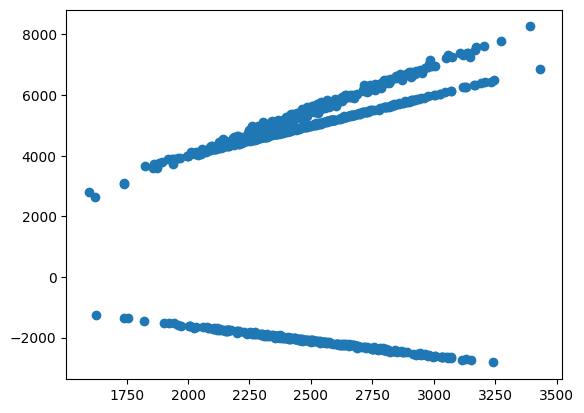

In [76]:
plt.scatter(df.Feature_1, df.Feature_3)

**4. Write your constructed dataframe to a csv file called fake_data.csv.**

In [77]:
df.to_csv('fake_data.csv')